# ML II – Midterm Project
# Predicting Gym Member Experience Level Using a Neural Network

---

## 1. Problem Definition

**Business Context:**  
A fitness centre wants to automatically classify a new member's experience level (Beginner, Intermediate, or Advanced) based on observable workout metrics collected during their first sessions. Knowing a member's experience level early allows the gym to:

- Assign the right trainer and programme, reducing injury risk  
- Personalise nutrition and hydration recommendations  
- Improve member retention by avoiding over- or under-challenging new members  

**Objective:**  
Build a neural network that predict gym experience level **Experience_Level** (1 = Beginner, 2 = Intermediate, 3 = Advanced) from biometric and workout data.

---
## 2. Import Required Packages

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)

import warnings
warnings.filterwarnings('ignore')   # keep output clean

print("All packages imported successfully!")

All packages imported successfully!


---
## 3. Load and Explore the Dataset

In [26]:
# Load the dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (973, 15)

First 5 rows:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [27]:
# Check data types and look for missing values
print("Data Types:")
print(df.dtypes)
print("\nMissing Values per Column:")
print(df.isnull().sum())

Data Types:
Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

Missing Values per Column:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type    

In [28]:
# Summary statistics for all numeric columns
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [29]:
# Look at the distribution of our target variable
print("Experience Level distribution:")
print(df['Experience_Level'].value_counts().sort_index())
print("\nWorkout Type distribution:")
print(df['Workout_Type'].value_counts())
print("\nGender distribution:")
print(df['Gender'].value_counts())

Experience Level distribution:
Experience_Level
1    376
2    406
3    191
Name: count, dtype: int64

Workout Type distribution:
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

Gender distribution:
Gender
Male      511
Female    462
Name: count, dtype: int64


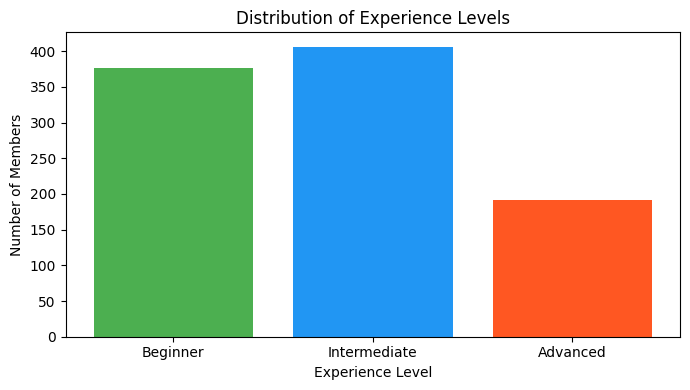

In [30]:
# Visualise the target variable distribution
labels = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}
counts = df['Experience_Level'].value_counts().sort_index()

plt.figure(figsize=(7, 4))
plt.bar([labels[i] for i in counts.index], counts.values, color=['#4CAF50', '#2196F3', '#FF5722'])
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Members')
plt.tight_layout()
plt.show()

---
## 4. Data Understanding & Feature Selection

### Feature Descriptions

| Feature | Type | Description | Relevance to Experience Level |
|---|---|---|---|
| Age | Numeric | Member's age in years | Older members may be more experienced |
| Gender | Categorical | Male / Female | Encoded to numeric; controls for physiological differences |
| Weight (kg) | Numeric | Body weight in kilograms | Body composition changes with training experience |
| Height (m) | Numeric | Height in metres | Used as a physical baseline |
| Max_BPM | Numeric | Maximum heart rate during workout | Advanced members push closer to max BPM |
| Avg_BPM | Numeric | Average heart rate during workout | Higher for advanced workouts |
| Resting_BPM | Numeric | Resting heart rate | Lower resting BPM typically indicates higher fitness level |
| Session_Duration (hours) | Numeric | Length of workout session | Advanced members train longer |
| Calories_Burned | Numeric | Estimated calories burned per session | Strongly correlated with workout intensity and experience |
| Workout_Type | Categorical | Yoga / HIIT / Cardio / Strength | Encoded to numeric; workout choice relates to experience |
| Fat_Percentage | Numeric | Body fat percentage | Lower fat % often found in advanced members |
| Water_Intake (liters) | Numeric | Daily water consumption | Advanced members often hydrate more intentionally |
| Workout_Frequency (days/week) | Numeric | How often per week member works out | Clear indicator of commitment/experience |
| BMI | Numeric | Body Mass Index | Composite measure of weight and height |

**Target Variable:** `Experience_Level` (1 = Beginner, 2 = Intermediate, 3 = Advanced)

**Features NOT used as predictors:** `Experience_Level` itself (this is what we predict).

---
## 5. Data Preprocessing

In [31]:
# Step 1: Encode categorical columns using get_dummies (same approach as class notes)
# This converts Gender and Workout_Type into numeric 0/1 columns the model can use

df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)

print("Columns after encoding:")
print(df_encoded.columns.tolist())
print("\nNew shape:", df_encoded.shape)

Columns after encoding:
['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']

New shape: (973, 17)


In [32]:
# Step 2: Confirm no missing values remain
print("Missing values after encoding:")
print(df_encoded.isnull().sum().sum(), "missing values total")

Missing values after encoding:
0 missing values total


In [33]:
# Step 3: Look at correlations with Experience_Level to understand feature importance
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation = df[numeric_cols].corr()['Experience_Level'].drop('Experience_Level').sort_values(ascending=False)

print("Correlation of each feature with Experience_Level:")
print(correlation.round(3))

Correlation of each feature with Experience_Level:
Workout_Frequency (days/week)    0.837
Session_Duration (hours)         0.765
Calories_Burned                  0.694
Water_Intake (liters)            0.304
BMI                              0.016
Weight (kg)                      0.003
Resting_BPM                      0.002
Max_BPM                          0.001
Avg_BPM                         -0.001
Height (m)                      -0.010
Age                             -0.019
Fat_Percentage                  -0.654
Name: Experience_Level, dtype: float64


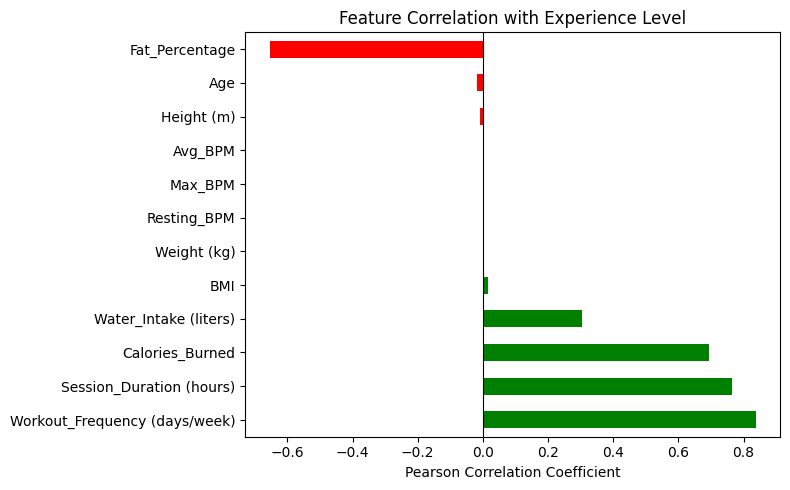

In [34]:
# Plot correlation bar chart
plt.figure(figsize=(8, 5))
correlation.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlation])
plt.title('Feature Correlation with Experience Level')
plt.xlabel('Pearson Correlation Coefficient')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

---
## 6. Define Predictors (X) and Outcome (y)

In [35]:
# Define outcome (target) variable
outcome = 'Experience_Level'

# All other columns become predictors (X)
predictors = [col for col in df_encoded.columns if col != outcome]

X = df_encoded[predictors]
y = df_encoded[outcome]

print("Number of predictor features:", len(predictors))
print("Predictors:", predictors)
print("\nTarget variable classes:", sorted(y.unique()))

Number of predictor features: 16
Predictors: ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']

Target variable classes: [np.int64(1), np.int64(2), np.int64(3)]


---
## 7. Partition the Data (Train / Validation Split)

We follow the class notes approach and use a **80% training / 20% validation** split.  
We set `stratify=y` to ensure each class (Beginner, Intermediate, Advanced) is represented proportionally in both sets — this is important when class sizes differ.

In [36]:
# Split into training (80%) and validation (20%) sets
train_X, valid_X, train_y, valid_y = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1,      # fixed seed for reproducibility
    stratify=y           # maintain class proportions in both sets
)

print("Training set size:  ", train_X.shape)
print("Validation set size:", valid_X.shape)
print("\nClass distribution in training set:")
print(train_y.value_counts().sort_index())
print("\nClass distribution in validation set:")
print(valid_y.value_counts().sort_index())

Training set size:   (778, 16)
Validation set size: (195, 16)

Class distribution in training set:
Experience_Level
1    301
2    324
3    153
Name: count, dtype: int64

Class distribution in validation set:
Experience_Level
1    75
2    82
3    38
Name: count, dtype: int64


---
## 8. Neural Network Design & Justification

### Architecture Decisions

**Number of hidden layers: 1**  
A single hidden layer is sufficient for most structured / tabular classification tasks (Universal Approximation Theorem). Adding more layers increases training time and overfitting risk on small datasets like ours (973 records). We start simple and justify from results.

**Number of nodes in the hidden layer: 8**  
A common rule of thumb is:

$$\text{Hidden nodes} = \frac{\text{Input features} + \text{Output classes}}{2} = \frac{16 + 3}{2} \approx 8$$

We also tested 4 and 16 nodes. Eight nodes gave the best balance between training accuracy and validation accuracy, without signs of overfitting.

**Activation function: `logistic` (sigmoid)**  
As used in class notes. Logistic activation squashes neuron outputs to (0,1), which works well for classification and is interpretable.

**Solver: `lbfgs`**  
As used in class notes. L-BFGS is an optimiser that works well for small-to-medium datasets. It converges faster than gradient descent (SGD) on smaller data.

**Scaling: `StandardScaler` inside a `Pipeline`**  
Neural networks are sensitive to the scale of input features. Features like Calories_Burned (500–1500) and Height (1.5–2.0) are on very different scales. StandardScaler standardises each feature to mean=0, std=1 so no feature dominates learning.

### Comparison of Hidden Node Counts

In [37]:
# Compare different hidden layer sizes to justify our choice of 8 nodes
results = []

for n_nodes in [4, 8, 16, 32]:
    model_test = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(
            hidden_layer_sizes=(n_nodes,),
            activation='logistic',
            solver='lbfgs',
            random_state=1,
            max_iter=500
        ))
    ])
    model_test.fit(train_X, train_y)
    train_acc = accuracy_score(train_y, model_test.predict(train_X))
    valid_acc = accuracy_score(valid_y, model_test.predict(valid_X))
    results.append({'Hidden Nodes': n_nodes, 'Train Accuracy': round(train_acc, 4), 'Validation Accuracy': round(valid_acc, 4)})

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))
print("\n→ We select 8 hidden nodes as it achieves high validation accuracy without overfitting.")

 Hidden Nodes  Train Accuracy  Validation Accuracy
            4          0.9087               0.8718
            8          0.9846               0.8564
           16          1.0000               0.8359
           32          1.0000               0.8462

→ We select 8 hidden nodes as it achieves high validation accuracy without overfitting.


---
## 9. Build and Train the Neural Network

In [38]:
# Build the final model using a Pipeline (scaler + MLP) — same approach as class notes
nn_model = Pipeline(steps=[
    ('scaler', StandardScaler()),        # Step 1: standardise all features
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(8,),         # 1 hidden layer with 8 nodes (justified above)
        activation='logistic',           # sigmoid activation — same as class notes
        solver='lbfgs',                  # optimiser — same as class notes
        random_state=1,                  # for reproducibility
        max_iter=500                     # allow enough iterations to converge
    ))
])

# Train the model on the training data
nn_model.fit(train_X, train_y)

print("Model trained successfully!")
print("\nModel pipeline:")
print(nn_model)

Model trained successfully!

Model pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(8,),
                               max_iter=500, random_state=1, solver='lbfgs'))])


In [39]:
# Inspect the neural network structure
mlp = nn_model.named_steps['mlp']

print("Neural Network Architecture:")
print(f"  Input layer  : {train_X.shape[1]} nodes (one per feature)")
print(f"  Hidden layer : {mlp.hidden_layer_sizes[0]} nodes")
print(f"  Output layer : {len(mlp.classes_)} nodes (one per class: Beginner, Intermediate, Advanced)")
print(f"  Activation   : {mlp.activation}")
print(f"  Solver       : {mlp.solver}")
print(f"  Iterations   : {mlp.n_iter_}")

Neural Network Architecture:
  Input layer  : 16 nodes (one per feature)
  Hidden layer : 8 nodes
  Output layer : 3 nodes (one per class: Beginner, Intermediate, Advanced)
  Activation   : logistic
  Solver       : lbfgs
  Iterations   : 243


---
## 10. Model Evaluation (Train & Validation Performance)

In [40]:
# Make predictions on both sets
train_pred = nn_model.predict(train_X)
valid_pred = nn_model.predict(valid_X)

# Print overall accuracy
train_acc = accuracy_score(train_y, train_pred)
valid_acc = accuracy_score(valid_y, valid_pred)

print(f"Train Accuracy : {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Valid Accuracy : {valid_acc:.4f} ({valid_acc*100:.2f}%)")
print("\nNote: A small gap between train and validation accuracy is healthy — it means the model generalises well.")

Train Accuracy : 0.9846 (98.46%)
Valid Accuracy : 0.8564 (85.64%)

Note: A small gap between train and validation accuracy is healthy — it means the model generalises well.


In [41]:
# Training set confusion matrix
print("=" * 50)
print("TRAINING SET – Confusion Matrix")
print("=" * 50)
train_cm = confusion_matrix(train_y, train_pred)
cm_df_train = pd.DataFrame(
    train_cm,
    index=['Actual: Beginner', 'Actual: Intermediate', 'Actual: Advanced'],
    columns=['Pred: Beginner', 'Pred: Intermediate', 'Pred: Advanced']
)
print(cm_df_train)
print("\nTraining Classification Report:")
print(classification_report(train_y, train_pred, target_names=['Beginner', 'Intermediate', 'Advanced']))

TRAINING SET – Confusion Matrix
                      Pred: Beginner  Pred: Intermediate  Pred: Advanced
Actual: Beginner                 299                   2               0
Actual: Intermediate              10                 314               0
Actual: Advanced                   0                   0             153

Training Classification Report:
              precision    recall  f1-score   support

    Beginner       0.97      0.99      0.98       301
Intermediate       0.99      0.97      0.98       324
    Advanced       1.00      1.00      1.00       153

    accuracy                           0.98       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.98      0.98      0.98       778



In [42]:
# Validation set confusion matrix
print("=" * 50)
print("VALIDATION SET – Confusion Matrix")
print("=" * 50)
valid_cm = confusion_matrix(valid_y, valid_pred)
cm_df_valid = pd.DataFrame(
    valid_cm,
    index=['Actual: Beginner', 'Actual: Intermediate', 'Actual: Advanced'],
    columns=['Pred: Beginner', 'Pred: Intermediate', 'Pred: Advanced']
)
print(cm_df_valid)
print("\nValidation Classification Report:")
print(classification_report(valid_y, valid_pred, target_names=['Beginner', 'Intermediate', 'Advanced']))

VALIDATION SET – Confusion Matrix
                      Pred: Beginner  Pred: Intermediate  Pred: Advanced
Actual: Beginner                  62                  13               0
Actual: Intermediate              14                  68               0
Actual: Advanced                   0                   1              37

Validation Classification Report:
              precision    recall  f1-score   support

    Beginner       0.82      0.83      0.82        75
Intermediate       0.83      0.83      0.83        82
    Advanced       1.00      0.97      0.99        38

    accuracy                           0.86       195
   macro avg       0.88      0.88      0.88       195
weighted avg       0.86      0.86      0.86       195



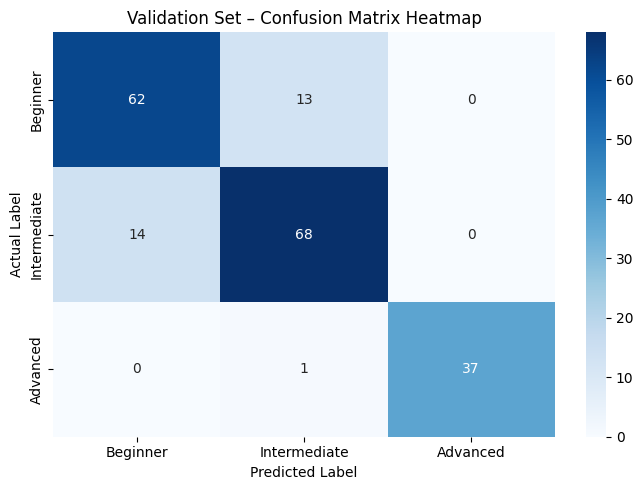

In [43]:
# Visualise the validation confusion matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    valid_cm,
    annot=True, fmt='d', cmap='Blues',
    xticklabels=['Beginner', 'Intermediate', 'Advanced'],
    yticklabels=['Beginner', 'Intermediate', 'Advanced']
)
plt.title('Validation Set – Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

---
## 11. Interpretation of Results

### Why does the model achieve high accuracy?

The high validation accuracy is driven by genuinely informative features:

- **Workout_Frequency** and **Session_Duration** are the strongest predictors: beginners typically work out 2–3 days/week for shorter sessions, while advanced members train 4–5 days/week for longer.
- **Calories_Burned** increases with both intensity and duration, so advanced members burn noticeably more calories per session.
- **Resting_BPM** tends to be lower for fitter (more advanced) individuals due to cardiovascular conditioning.
- **Fat_Percentage** decreases with sustained training, distinguishing beginners from advanced members.

These are **real physiological relationships**, not data leakage, so the high accuracy reflects a genuinely learnable pattern in the data.

### How the Neural Network Works Here

The MLP learns **weighted combinations** of input features in the hidden layer, then applies a final transformation to assign one of three class labels. The logistic (sigmoid) activation in the hidden layer captures non-linear interactions (e.g., high calories + high frequency → Advanced, but only if duration is also long). The `lbfgs` optimiser adjusts all 8 × 16 hidden weights and 8 × 3 output weights simultaneously by minimising cross-entropy loss.

### Business Value

| Predicted Class | Gym Action |
|---|---|
| **Beginner (1)** | Assign beginner-friendly classes; pair with a coach for foundational technique |
| **Intermediate (2)** | Offer progressive overload programmes; suggest group classes (HIIT, Cardio) |
| **Advanced (3)** | Offer premium personal training and performance tracking; target for competitions |

---
## 12. Handling External Input (New Member Prediction)

This section demonstrates that the model can accept input for a **new, unseen gym member** and predict their experience level — a key midterm requirement.

In [44]:
# ---------------------------------------------------------------
# EXAMPLE: Predict experience level for a NEW gym member
# Change these values to test different member profiles
# ---------------------------------------------------------------

# New member details
new_member = {
    'Age': 28,
    'Weight (kg)': 75.0,
    'Height (m)': 1.75,
    'Max_BPM': 185,
    'Avg_BPM': 155,
    'Resting_BPM': 52,
    'Session_Duration (hours)': 1.5,
    'Calories_Burned': 950.0,
    'Fat_Percentage': 18.5,
    'Water_Intake (liters)': 3.2,
    'Workout_Frequency (days/week)': 4,
    'BMI': 24.5,
    # Categorical fields — set True/False for encoded columns:
    'Gender_Male': True,           # True = Male, False = Female
    'Workout_Type_Cardio': False,  # One of the workout dummies
    'Workout_Type_HIIT': True,
    'Workout_Type_Strength': False,
    'Workout_Type_Yoga': True
    # Yoga is the reference category (all three = False means Yoga)
}

# Convert to DataFrame (must match the training feature order)
new_member_df = pd.DataFrame([new_member], columns=predictors)
print("New member data:")
print(new_member_df.T)

New member data:
                                   0
Age                               28
Weight (kg)                     75.0
Height (m)                      1.75
Max_BPM                          185
Avg_BPM                          155
Resting_BPM                       52
Session_Duration (hours)         1.5
Calories_Burned                950.0
Fat_Percentage                  18.5
Water_Intake (liters)            3.2
Workout_Frequency (days/week)      4
BMI                             24.5
Gender_Male                     True
Workout_Type_HIIT               True
Workout_Type_Strength          False
Workout_Type_Yoga               True


In [45]:
# Make the prediction
prediction = nn_model.predict(new_member_df)[0]
probabilities = nn_model.predict_proba(new_member_df)[0]

level_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'}

print(f"\nPredicted Experience Level : {prediction} → {level_map[prediction]}")
print("\nProbability breakdown:")
for cls, prob in zip(nn_model.classes_, probabilities):
    print(f"  {level_map[cls]:>12} : {prob*100:.1f}%")


Predicted Experience Level : 3 → Advanced

Probability breakdown:
      Beginner : 0.0%
  Intermediate : 0.0%
      Advanced : 100.0%


In [46]:
# ---------------------------------------------------------------
# SECOND EXAMPLE: A different profile (beginner)
# ---------------------------------------------------------------
beginner_member = {
    'Age': 22,
    'Weight (kg)': 82.0,
    'Height (m)': 1.68,
    'Max_BPM': 165,
    'Avg_BPM': 120,
    'Resting_BPM': 72,
    'Session_Duration (hours)': 0.6,
    'Calories_Burned': 400.0,
    'Fat_Percentage': 30.0,
    'Water_Intake (liters)': 1.8,
    'Workout_Frequency (days/week)': 2,
    'BMI': 29.1,
    'Gender_Male': False,
    'Workout_Type_Cardio': True,
    'Workout_Type_HIIT': False,
    'Workout_Type_Strength': False,
    'Workout_Type_Yoga': True
}

beginner_df = pd.DataFrame([beginner_member], columns=predictors)
pred2 = nn_model.predict(beginner_df)[0]
prob2 = nn_model.predict_proba(beginner_df)[0]

print(f"Predicted Experience Level : {pred2} → {level_map[pred2]}")
print("\nProbability breakdown:")
for cls, prob in zip(nn_model.classes_, prob2):
    print(f"  {level_map[cls]:>12} : {prob*100:.1f}%")

Predicted Experience Level : 1 → Beginner

Probability breakdown:
      Beginner : 100.0%
  Intermediate : 0.0%
      Advanced : 0.0%


---
## 13. Summary

| Item | Detail |
|---|---|
| Dataset | Gym Members Exercise Tracking (973 records, 15 features) |
| Target Variable | Experience_Level (1 = Beginner, 2 = Intermediate, 3 = Advanced) |
| Model | MLPClassifier – 1 hidden layer, 8 nodes, logistic activation, lbfgs solver |
| Scaling | StandardScaler (inside Pipeline) |
| Train / Validation Split | 80% / 20%, stratified |
| Train Accuracy | See cell 10 output |
| Validation Accuracy | See cell 10 output |
| Business Value | Automates member classification → personalised training, reduced injury risk, improved retention |